In [1]:
import pandas as pd
import os, glob
import numpy as np
from scipy.stats import t
#from google.colab import drive
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re
pd.options.display.float_format = '{:e}'.format
#!pip install rampy
import rampy
from sklearn.metrics import r2_score
from scipy.stats import linregress

from matplotlib.ticker import ScalarFormatter
from matplotlib import rcParams

# Set the default font to Times
rcParams['font.family'] = 'Times New Roman'

PALETTE = ['#1b6872', '#df208a', '#efb475', '#aec5fb', '#D5A6E6', '#A4D4B4', '#FFD166', '#FF6F61']

In [2]:
path = "MEDIDAS 2709"

In [3]:
# Define relative path to folder containing the text files
files_folder = str(path)

# Create a dataframe list by using a list WITHprehension
files = [pd.read_csv(file, delimiter=',', skiprows=5, encoding = 'utf16') for file in glob.glob(os.path.join(files_folder ,"*.csv"))]

# Get filenames
electrode = [os.path.basename(filename)[:].rstrip('csv') for filename in glob.glob(os.path.join(files_folder ,"*.csv"))]

print(electrode)

# Concatenate the list of DataFrames into one
files_df = pd.concat(files, axis=1)
files_df = files_df[['V','µA']]
files_df = files_df.T.drop_duplicates().T

sensor = electrode
d ={'µA':sensor}
files_df = files_df.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)

files_df.columns

['1-D0-SVW-FF-1.', '1-D0-SVW-FF-2.', '1-D0-SVW-FF.', '1-D1-SVW-FF-1.', '1-D1-SVW-FF-2.', '1-D1-SVW-FF.', '1-D2-SWV-FF-1.', '1-D2-SWV-FF-2.', '1-D2-SWV-FF.', '1-D3-SVW-FF-1.', '1-D3-SVW-FF-2.', '1-D3-SVW-FF.', '1-D4-SVW-FF-1.', '1-D4-SVW-FF-2.', '1-D4-SVW-FF.', '2-D0-SVW-FF-1.', '2-D0-SVW-FF-2.', '2-D0-SVW-FF.', '2-D1-SVW-FF-1.', '2-D1-SVW-FF-2.', '2-D1-SVW-FF.', '2-D2-SWV-FF-1.', '2-D2-SWV-FF-2.', '2-D2-SWV-FF.', '2-D3-SVW-FF-1.', '2-D3-SVW-FF-2.', '2-D3-SVW-FF.', '2-D4-SVW-FF-1.', '2-D4-SVW-FF-2.', '2-D4-SVW-FF.', '3-D0-SVW-FF-1.', '3-D0-SVW-FF-2.', '3-D0-SVW-FF.', '3-D1-SVW-FF-1.', '3-D1-SVW-FF-2.', '3-D1-SVW-FF.', '3-D2-SWV-FF-1.', '3-D2-SWV-FF-2.', '3-D2-SWV-FF.', '3-D3-SVW-FF-1.', '3-D3-SVW-FF-2.', '3-D3-SVW-FF.', '3-D4-SVW-FF-1.', '3-D4-SVW-FF-2.', '3-D4-SVW-FF.', '4-D0-SVW-FF-1.', '4-D0-SVW-FF-2.', '4-D0-SVW-FF.', '4-D1-SVW-FF-1.', '4-D1-SVW-FF-2.', '4-D1-SVW-FF.', '4-D2-SWV-FF-1.', '4-D2-SWV-FF.', '4-D3-SVW-FF-1.', '4-D3-SVW-FF-2.', '4-D3-SVW-FF.', '4-D4-SVW-FF-1.', '4-D4-SVW-F

Index(['V', '1-D0-SVW-FF-1.', '1-D0-SVW-FF-2.', '1-D0-SVW-FF.',
       '1-D1-SVW-FF-1.', '1-D1-SVW-FF-2.', '1-D1-SVW-FF.', '1-D2-SWV-FF-1.',
       '1-D2-SWV-FF-2.', '1-D2-SWV-FF.', '1-D3-SVW-FF-1.', '1-D3-SVW-FF-2.',
       '1-D3-SVW-FF.', '1-D4-SVW-FF-1.', '1-D4-SVW-FF-2.', '1-D4-SVW-FF.',
       '2-D0-SVW-FF-1.', '2-D0-SVW-FF-2.', '2-D0-SVW-FF.', '2-D1-SVW-FF-1.',
       '2-D1-SVW-FF-2.', '2-D1-SVW-FF.', '2-D2-SWV-FF-1.', '2-D2-SWV-FF-2.',
       '2-D2-SWV-FF.', '2-D3-SVW-FF-1.', '2-D3-SVW-FF-2.', '2-D3-SVW-FF.',
       '2-D4-SVW-FF-1.', '2-D4-SVW-FF-2.', '2-D4-SVW-FF.', '3-D0-SVW-FF-1.',
       '3-D0-SVW-FF-2.', '3-D0-SVW-FF.', '3-D1-SVW-FF-1.', '3-D1-SVW-FF-2.',
       '3-D1-SVW-FF.', '3-D2-SWV-FF-1.', '3-D2-SWV-FF-2.', '3-D2-SWV-FF.',
       '3-D3-SVW-FF-1.', '3-D3-SVW-FF-2.', '3-D3-SVW-FF.', '3-D4-SVW-FF-1.',
       '3-D4-SVW-FF-2.', '3-D4-SVW-FF.', '4-D0-SVW-FF-1.', '4-D0-SVW-FF-2.',
       '4-D0-SVW-FF.', '4-D1-SVW-FF-1.', '4-D1-SVW-FF-2.', '4-D1-SVW-FF.',
       '4-D2-SWV-FF-

['1-D0', '1-D0', '1-D0', '1-D1', '1-D1', '1-D1', '1-D2', '1-D2', '1-D2', '1-D3', '1-D3', '1-D3', '1-D4', '1-D4', '1-D4', '2-D0', '2-D0', '2-D0', '2-D1', '2-D1', '2-D1', '2-D2', '2-D2', '2-D2', '2-D3', '2-D3', '2-D3', '2-D4', '2-D4', '2-D4', '3-D0', '3-D0', '3-D0', '3-D1', '3-D1', '3-D1', '3-D2', '3-D2', '3-D2', '3-D3', '3-D3', '3-D3', '3-D4', '3-D4', '3-D4', '4-D0', '4-D0', '4-D0', '4-D1', '4-D1', '4-D1', '4-D2', '4-D2', '4-D3', '4-D3', '4-D3', '4-D4', '4-D4']


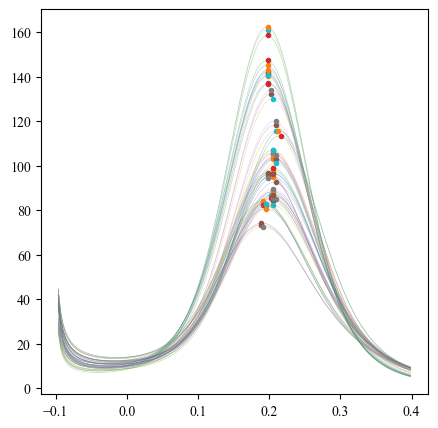

In [4]:
plt.rcParams["figure.figsize"] = (5,5)

files_df['V'] = pd.to_numeric(files_df['V'], downcast='float',  errors='coerce')

x = files_df['V'] # First column data
df = files_df.loc[(files_df['V']<=0.3) & (files_df['V']>=-0.1)].reset_index(drop=True) #select X range
col1 = df['V'] # First column data

peak_current = []
v_peak_current = []
eletrodo = []

a = 0

for column in files_df.columns[1:]:
        y = files_df[column]
        col2 = df[column] # Second column data

        #Find peaks
        peak_idx, _ = find_peaks(col2, prominence=0.000000001, height = 0.00 , distance = 100)  # Find peaks

        #Potential applied and array informations
        v_peak_current.append(df.at[peak_idx.max(),'V'])
        peak_current.append(col2[peak_idx.max()])
        condicao = re.findall('(\d+[A-Za-z]+|[A-Za-z]+\d+|\d+|[A-Za-z]+)', column)
        #print(condicao)

        eletrodo.append( condicao[0] + '-' + condicao[1])

        #Plot data
        plt.plot(x,y, lw=0.4, alpha=0.4 )

        #Plot peaks and valleys
        plt.plot(col1[peak_idx],col2[peak_idx], marker="o", ls="", ms=3)

        #Read data
        a+=1

plt.xticks([-0.1,0.0,0.1,0.2,0.3,0.4])
print(eletrodo)
#print(a)
#print(eletrodo[0])

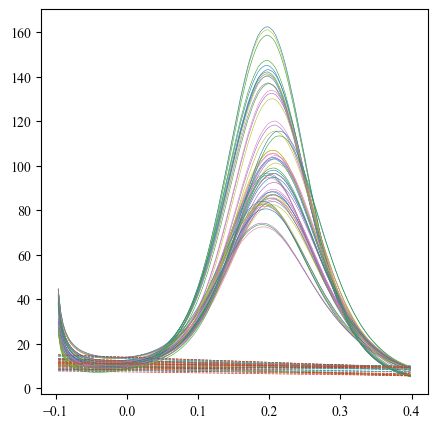

In [5]:
plt.rcParams["figure.figsize"] = (5,5)

baseline_data = {}

bl_1 = []

# need to define some fitting regions for the spline
roi = np.array([[-0.055,-0.0],[0.39,0.4]])

x = files_df['V'].to_numpy(dtype=float)
x = x[~np.isnan(x)]

baseline_data['V'] = x

for column in files_df.columns[1:]:
    y = files_df[column].to_numpy(dtype=float)
    y = y[~np.isnan(y)]
    # calculating the baselines
    ycalc_poly, base_poly = rampy.baseline(x, y, roi, 'poly', polynomial_order=1)
    bl_1.extend(base_poly[peak_idx[0]])
    #data - baseline
    subtracted = list()
    for item1, item2 in zip(y, base_poly):
        item = item1 - item2
        subtracted.extend(item)
    baseline_data[column] = subtracted
    #plot
    plt.plot(x, y, lw = 0.4)
    plt.plot(x, base_poly,linestyle= 'dashed', lw = 0.5)

In [6]:
print(eletrodo)

['1-D0', '1-D0', '1-D0', '1-D1', '1-D1', '1-D1', '1-D2', '1-D2', '1-D2', '1-D3', '1-D3', '1-D3', '1-D4', '1-D4', '1-D4', '2-D0', '2-D0', '2-D0', '2-D1', '2-D1', '2-D1', '2-D2', '2-D2', '2-D2', '2-D3', '2-D3', '2-D3', '2-D4', '2-D4', '2-D4', '3-D0', '3-D0', '3-D0', '3-D1', '3-D1', '3-D1', '3-D2', '3-D2', '3-D2', '3-D3', '3-D3', '3-D3', '3-D4', '3-D4', '3-D4', '4-D0', '4-D0', '4-D0', '4-D1', '4-D1', '4-D1', '4-D2', '4-D2', '4-D3', '4-D3', '4-D3', '4-D4', '4-D4']


In [7]:
results = pd.DataFrame()

results['eletrodo'] = eletrodo
results['peak_current'] = peak_current
results['v_peak_current'] = v_peak_current
results['baseline_current'] = bl_1

results_baseline = pd.DataFrame()

results_baseline['eletrodo'] = eletrodo
results_baseline['peak_current'] = results.apply(lambda row : row['peak_current'] - row['baseline_current'], axis=1)
results_baseline['v_peak_current'] = v_peak_current

results_baseline.head()

,eletrodo,peak_current,v_peak_current
0,1-D0,1.323971e+02,1.983213e-01
1,1-D0,1.343188e+02,1.983213e-01
2,1-D0,1.299997e+02,1.983213e-01
3,1-D1,9.556564e+01,2.053528e-01
4,1-D1,9.720718e+01,2.053528e-01


In [8]:
#results_baseline.to_excel('08 29 24 limpos L7 lote 1.xlsx')

In [9]:
# results_mean_1 será para os dados de antes de a gente ir embora para consulta
# e results_mean_2 para os que a Juliana fez sozinha depois

results_mean = results_baseline.groupby(['eletrodo'], as_index=False)[['peak_current','v_peak_current']].agg({'peak_current':['mean','std'],'v_peak_current':['mean','std']})

results_mean

eletrodo peak_current              v_peak_current             
                    mean          std           mean          std
0      1-D0 1.322385e+02 2.163924e+00   1.983213e-01 0.000000e+00
1      1-D1 9.557069e+01 1.633969e+00   2.053528e-01 0.000000e+00
2      1-D2 7.606260e+01 1.529616e+00   2.065245e-01 2.029527e-03
3      1-D3 7.624635e+01 1.008897e+00   2.030087e-01 2.030077e-03
4      1-D4 7.316896e+01 1.237487e+00   2.053528e-01 0.000000e+00
5      2-D0 1.372268e+02 2.780466e+00   1.983213e-01 0.000000e+00
6      2-D1 9.594669e+01 1.331460e+00   2.053528e-01 0.000000e+00
7      2-D2 8.575161e+01 6.452138e-01   1.983213e-01 0.000000e+00
8      2-D3 7.255199e+01 3.685189e-01   1.912899e-01 0.000000e+00
9      2-D4 9.609065e+01 3.185194e+01   2.030090e-01 4.059604e-03
10     3-D0 1.247464e+02 1.386827e+01   2.018369e-01 6.089131e-03
11     3-D1 1.007016e+02 1.445518e+01   2.076963e-01 2.029527e-03
12     3-D2 7.978727e+01 8.071123e+00   2.030087e-01 7.318632e-03
13     3-D3 6.800326e+01 5.301534e+00   1.924617e-01 4.059053e-03
14     3-D4 9.279860e+01 5.292189e+01   1.924620e-01 5.370143e-03
15     4-D0 1.438738e+02 1.723118e+01   1.994931e-01 2.029527e-03
16     4-D1 1.178606e+02 1.059930e+01   2.065242e-01 5.370039e-03
17     4-D2 9.863437e+01 7.924132e+00   2.123837e-01 4.971980e-03
18     4-D3 9.133801e+01 3.337641e+00   2.076963e-01 2.029527e-03
19     4-D4 8.793141e+01 1.308107e+00   2.053528e-01 0.000000e+00

In [10]:
print(list(results_mean['eletrodo']))

['1-D0', '1-D1', '1-D2', '1-D3', '1-D4', '2-D0', '2-D1', '2-D2', '2-D3', '2-D4', '3-D0', '3-D1', '3-D2', '3-D3', '3-D4', '4-D0', '4-D1', '4-D2', '4-D3', '4-D4']


In [11]:
CONCENTRATIONS = np.array([0.01, 0.1, 1, 10])*0.9

['1-D1', '1-D2', '1-D3', '1-D4']
['2-D1', '2-D2', '2-D3', '2-D4']
['3-D1', '3-D2', '3-D3', '3-D4']
['4-D1', '4-D2', '4-D3', '4-D4']
BULK:

Standard Deviation: 4.395762873765435

R² of the linear regression: 0.9561

Sensitivity: 9.5385



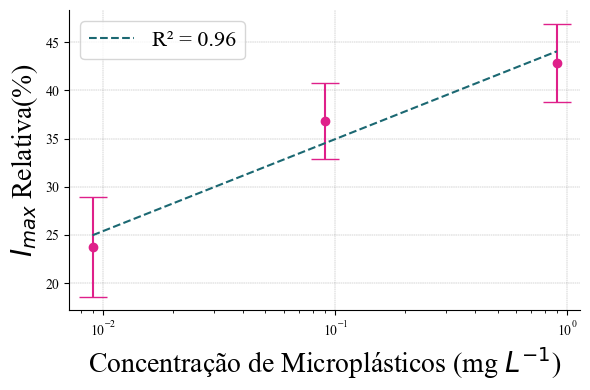

In [20]:
colors = PALETTE
ELEC = []
LIMPOS = []

# Create electrodes and limpos lists for electrodes 17 to 20
for u in range(1, 5):
    electrodes = [f'{u}-D{i}' for i in range(1, 5)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-D0']
    LIMPOS.append(limpos)

# Data storage for the bar plot
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4), sharey = False)

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = np.absolute(100 * (I_mean - BRANCO) / BRANCO)
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+17}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

# Plot the average on ax1 (dots with error bars, no connecting lines)
ax1.errorbar(CONCENTRATIONS[:-1], avg_normalized_means[:-1], yerr=avg_normalized_stds[:-1], fmt='o', color=PALETTE[1], capsize=10)#, label='Average')
ax1.set_xscale('log')
ax1.set_xlabel(r'Concentração de Microplásticos (mg $L^{-1}$)', fontsize=20)
ax1.set_ylabel('$I_{max}$ Relativa(%)', fontsize=20)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS[:-1])  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means[:-1])

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax1.plot(CONCENTRATIONS[:-1], regression_line, color=PALETTE[0], label=f'R² = {r_value**2:.2f}', linestyle = '--')

# Set x-ticks and x-labels for the first plot
#ax.set_xticks(np.arange(1, len(electrodes) + 1))
#ax.set_xlabel('Concentration mg/L', fontsize=16)
#ax.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
ax1.legend(fontsize = 16)
#ax.spines[['right', 'top']].set_visible(False)
ax1.spines[['right', 'top']].set_visible(False)


#fig.suptitle('Drop Casting WITHOUT CBM', fontsize=25)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('figures/BULK.png', dpi=200, transparent = True)
#

# Print R-squared value
print('BULK:')
print()
print(f"Standard Deviation: {np.average(avg_normalized_stds[:-1])}")
print()
print(f"R² of the linear regression: {r_value**2:.4f}")
print()
print(f"Sensitivity: {slope:.4f}"); 
print()

In [13]:
def RC_circuit(z_data, w_data):
    # Exemplo de dados
    x = 1/np.array(w_data)  # x é uma lista de valores reais
    y = np.array(z_data)  # y é uma lista de valores complexos
    
    # Número de pontos
    n = len(x)
    
    # Cálculo dos coeficientes a (complexo) e b (complexo)
    A = np.vstack([x, np.ones(n)]).T  # Matriz do sistema
    a, b = np.linalg.lstsq(A, y, rcond=None)[0]  # Calcula a e b
    C = 1/a
    R = b.real
    return R, C


In [14]:
#Branco:
DATASETS = []

for i in range(5, 9):
    Rs = []
    Cs = []
    #print(i, u)
    path = fr'EIS 27_09/{i}-limpo-EIS-NaSO4.csv'
    dados = pd.read_csv(path, skiprows=5, encoding='utf-16')
    dados.columns = ['freq', 'neg_phase', 'Idc', 'Z', "Z'", '-Z\'', 'Cs', 'ble']
    DATASETS.append(dados)
    z1_data = np.array(dados["Z'"][5:-6])
    z2_data = -np.array(dados['-Z\''][5:-6])
    z_data = list(z1_data + 1j * z2_data)
    w_data_str = np.array(dados['freq'][5:-6])
    #print(w_data_str)
    w_data = np.array([float(t) for t in w_data_str])
    R, C = RC_circuit(z_data, w_data)
    C = abs(C)
    
    Rs.append(R)
    Cs.append(C)
R_limpo = np.mean(Rs)
C_limpo = np.mean(Cs)
    
R_mean = []
R_std = []
C_mean = []
C_std = []
for i in range(5, 9):
    Rs = []
    Cs = []
    for u in range(1, 5):
        #print(i, u)
        path = fr'EIS 27_09/{i}-D{u}-EIS-NaSO4.csv'

        dados = pd.read_csv(path, skiprows=5, encoding='utf-16')
        dados.columns = ['freq', 'neg_phase', 'Idc', 'Z', "Z'", '-Z\'', 'Cs', 'ble']
        DATASETS.append(dados)
        z1_data = np.array(dados["Z'"][5:-6])
        z2_data = -np.array(dados['-Z\''][5:-6])
        z_data = list(z1_data + 1j * z2_data)
        w_data_str = np.array(dados['freq'][5:-6])
        #print(w_data_str)
        w_data = np.array([float(t) for t in w_data_str])
        R, C = RC_circuit(z_data, w_data)
        C = abs(C)
        
        Rs.append(R)
        Cs.append(C)
    R = np.mean(Rs)
    R = 100*(R - R_limpo)/R_limpo
    uR = 100*np.std(Rs)/R_limpo
    C = np.mean(Cs)
    C = 100*(C - C_limpo)/C_limpo
    uC = 100*np.std(Cs)/C_limpo
    R_mean.append(R)
    R_std.append(uR)
    C_mean.append(C)
    C_std.append(uC)

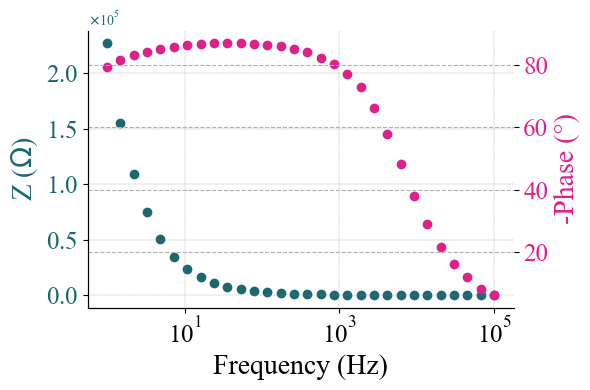

In [19]:
fig,ax1 = plt.subplots(1,1, figsize = (6,4))

path = fr'EIS 27_09/5-limpo-EIS-NaSO4.csv'
dados = pd.read_csv(path, skiprows=5, encoding='utf-16')
dados.columns = ['freq', 'neg_phase', 'Idc', 'Z', "Z'", '-Z\'', 'Cs', 'ble']

Z1 = np.array(dados["Z'"][:-1])
Z2 = -np.array(dados['-Z\''][:-1])
w_data_str = np.array(dados['freq'][:-1])
w = np.array([float(t) for t in w_data_str])
Z = np.sqrt(Z1**2 + Z2**2)
phase = -180*np.arctan(Z2/Z1)/np.pi

ax5 = ax1.twinx()
# Set the x-axis to a logarithmic scale
ax1.set_xscale('log')
# Plot Z on the left y-axis
ax1.scatter(w, Z, color=PALETTE[0], label='Z')
ax1.set_ylabel(r'Z ($\Omega$)', fontsize=20, color=PALETTE[0])
ax1.set_xlabel(r'Frequency (Hz)', fontsize=20)

ax1.tick_params(axis='y', labelcolor=PALETTE[0],labelsize=18)
ax1.tick_params(axis='x', labelcolor='0',labelsize=18)

ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# Plot phase on the right y-axis
ax5.scatter(w, phase, color=PALETTE[1], label='-Phase')
ax5.set_ylabel('-Phase (°)', fontsize=20, color=PALETTE[1])
ax5.tick_params(axis='y', labelcolor=PALETTE[1])
ax5.tick_params(axis='both', which='major', labelsize=18)
# Common settings for the x-axis
ax5.set_xlabel('Frequency (Hz)', fontsize=20)
ax5.tick_params(axis='both', which='major', labelsize=18)
ax5.grid(True, which='both', linestyle='--')
#plt.ylim(0, 5000)
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
ax1.spines[['right', 'top']].set_visible(False)
ax5.spines[['right', 'top']].set_visible(False)

#ax1.set_title(r'Bode Plot NaSO$_4$', fontsize = 18)
plt.tight_layout()
plt.savefig('figures/BODE_NaSO4.png', dpi = 200, transparent = True)
plt.savefig('figures/capacitivo1.png', dpi = 200, transparent = True)

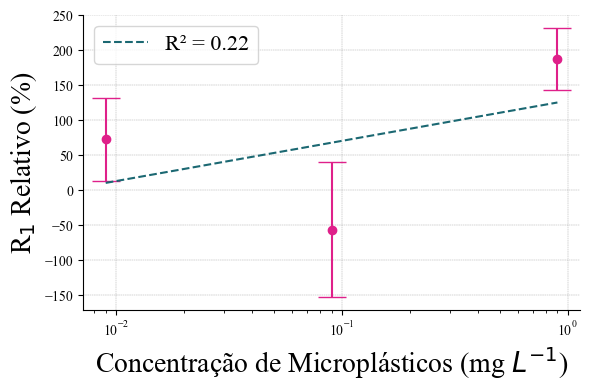

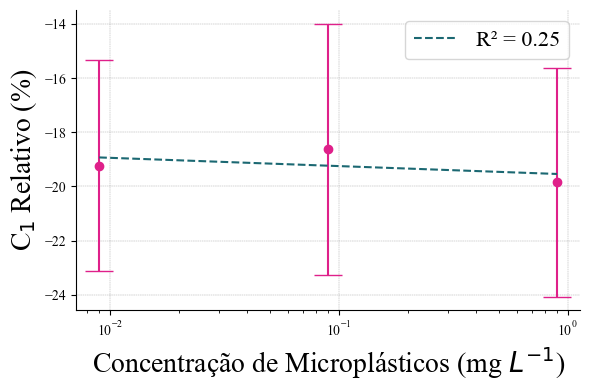

In [30]:
fig1, ax1 = plt.subplots(1, 1, figsize=(6, 4))
fig2, ax2 = plt.subplots(1, 1, figsize=(6, 4))




    
ax1.errorbar(CONCENTRATIONS[:-1], R_mean[:-1], yerr=R_std[:-1], fmt='o', color=PALETTE[1], capsize=10)#, label='Average')
ax1.set_xscale('log')
ax1.set_xlabel(r'Concentração de Microplásticos (mg $L^{-1}$)', fontsize=20)
ax2.set_xlabel(r'Concentração de Microplásticos (mg $L^{-1}$)', fontsize=20)


ax1.spines[['right', 'top']].set_visible(False)
ax1.set_ylabel('R$_{1}$ Relativo (%)', fontsize=20)
ax2.set_ylabel('C$_{1}$ Relativo (%)', fontsize=20)

#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS[:-1])  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, R_mean[:-1])

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax1.plot(CONCENTRATIONS[:-1], regression_line, color=PALETTE[0], label=f'R² = {r_value**2:.2f}', linestyle = '--')
#fig.suptitle('Drop Casting WITHOUT CBM', fontsize=25)
ax1.legend(fontsize = 16)

ax2.errorbar(CONCENTRATIONS[:-1], C_mean[:-1], yerr=C_std[:-1], fmt='o', color=PALETTE[1], capsize=10)#, label='Average')
ax2.set_xscale('log')

ax2.spines[['right', 'top']].set_visible(False)
#a21.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax2.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
# 2erform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS[:-1])  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, C_mean[:-1])

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax2.plot(CONCENTRATIONS[:-1], regression_line, color=PALETTE[0], label=f'R² = {r_value**2:.2f}', linestyle = '--')
#fig.suptitle('Drop Casting WITHOUT CBM', fontsize=25)
ax2.legend(fontsize = 16)
# Adjust layout and save the plot
fig1.tight_layout()
fig2.tight_layout()

#fig.subplots_adjust(wspace=0.35)
fig1.savefig('figures/NaSO4_1.png', dpi = 200, transparent = True)
fig2.savefig('figures/NaSO4_2.png', dpi = 200, transparent = True)


In [17]:
print(R_mean)

[72.53382233066912, -56.41054938321966, 187.60406482376413, -292557.59872782166]
